<a href="https://colab.research.google.com/github/s7500/blog-fullstack/blob/main/IA_Rask_Doblaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

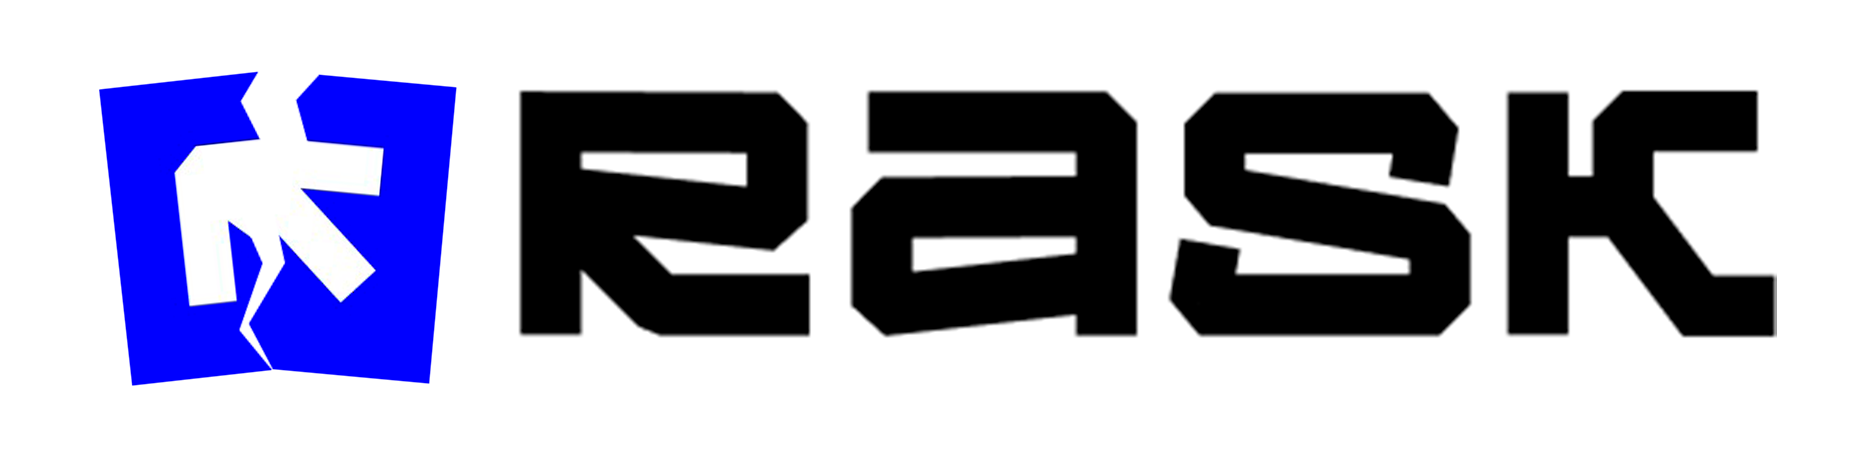

This code has been created for educational purposes. I assume no responsibility for how this notebook is utilized under any circumstances.

With this notebook, you can create audio dubbings using multiple voices. This AI is capable of detecting the tonalities of each voice and replicating them in other languages.

This code was developed by: AI (Interest System).

Visit my channel: [Hare](https://www.youtube.com/channel/UC1ejkTHsiq8aQAeYIZyIyeg/)

In [ ]:
#@title Install libraries
!pip install --upgrade youtube-dl
!pip install pytube moviepy
!pip install youtube_dl moviepy
!!pip install pydub

In [ ]:
#@title Option 1 - Upload MP3 Audio
!pip install pydub

from google.colab import files
from pydub import AudioSegment
import os
import shutil

# Directorio que deseas borrar
directorio_a_borrar = "/content/audio_output"

# Verificar si el directorio existe
if os.path.exists(directorio_a_borrar):
    #print(f"El directorio '{directorio_a_borrar}' ya existe. Borrándolo y creándolo de nuevo.")
    shutil.rmtree(directorio_a_borrar)  # Borrar el directorio y su contenido

# Crear el directorio
os.mkdir(directorio_a_borrar)
#print(f"Directorio '{directorio_a_borrar}' creado correctamente.")



# Definir la carpeta de destino
destination_folder = "/content/tmp"

file_path_audio = "/content/tmp/audio_input.mp3"

folder_path_audio_input = "/content/tmp/audio_input"

# Verificar que la carpeta exista
if os.path.exists(folder_path_audio_input):
    # Eliminar la carpeta y su contenido
    shutil.rmtree(folder_path_audio_input, ignore_errors=True)

# Crear la carpeta de nuevo
os.makedirs(folder_path_audio_input, exist_ok=True)

# Verificar si el archivo de audio existe y eliminarlo
if os.path.exists(file_path_audio):
    # Eliminar el archivo de audio
    os.remove(file_path_audio)

# Subir el archivo MP3
uploaded = files.upload()

# Verificar si se ha subido algún archivo
if len(uploaded) > 0:
    # Obtener el nombre del archivo subido
    uploaded_file_name = list(uploaded.keys())[0]

    # Nuevo nombre que deseas dar al archivo
    new_file_name = "audio_input.mp3"

    # Mover el archivo subido a la carpeta de destino con el nuevo nombre
    shutil.move(uploaded_file_name, os.path.join(destination_folder, new_file_name))

    print(f"El archivo {uploaded_file_name} ha sido subido y renombrado como {new_file_name} en {destination_folder}.")
else:
    print("No se subió ningún archivo.")

# Ruta del archivo MP3 de entrada
audio_input_path = "/content/tmp/audio_input.mp3"

# Carpeta de salida donde se guardarán los fragmentos
output_folder = "/content/tmp/audio_input/"

# Asegurarse de que la carpeta de salida exista
os.makedirs(output_folder, exist_ok=True)

# Duración de cada fragmento en milisegundos (en este caso, 5 segundos)
duration_per_fragment = 60 * 1000

# Abrir el archivo MP3
audio = AudioSegment.from_mp3(audio_input_path)

# Dividir el audio en fragmentos
fragment_count = 1
start_time = 0

while start_time < len(audio):
    end_time = start_time + duration_per_fragment
    output_filename = os.path.join(output_folder, f"{str(fragment_count).zfill(4)}.mp3")
    fragment = audio[start_time:end_time]
    fragment.export(output_filename, format="mp3")
    fragment_count += 1
    start_time = end_time

print(f"Se han dividido {fragment_count - 1} fragmentos de audio y se han guardado en la carpeta {output_folder}.")

Saving Y2meta.app - AutoGen Tutorial 2.0 🔥 How to Build POWERFUL AI Agents with AutoGen Studio UI (128 kbps).mp3 to Y2meta.app - AutoGen Tutorial 2.0 🔥 How to Build POWERFUL AI Agents with AutoGen Studio UI (128 kbps).mp3
El archivo Y2meta.app - AutoGen Tutorial 2.0 🔥 How to Build POWERFUL AI Agents with AutoGen Studio UI (128 kbps).mp3 ha sido subido y renombrado como audio_input.mp3 en /content/tmp.
Se han dividido 24 fragmentos de audio y se han guardado en la carpeta /content/tmp/audio_input/.


In [ ]:
#@title Option 2 – Youtube Audio Download

import os
from pytube import YouTube
from moviepy.editor import VideoFileClip
from moviepy.editor import AudioFileClip
from pydub import AudioSegment

# Directorio que deseas borrar
directorio_a_borrar = "/content/audio_output"

# Verificar si el directorio existe
if os.path.exists(directorio_a_borrar):
    #print(f"El directorio '{directorio_a_borrar}' ya existe. Borrándolo y creándolo de nuevo.")
    shutil.rmtree(directorio_a_borrar)  # Borrar el directorio y su contenido

# Crear el directorio
os.mkdir(directorio_a_borrar)
#print(f"Directorio '{directorio_a_borrar}' creado correctamente.")



# Definir la carpeta de destino
destination_folder = "/content/tmp"

file_path_audio = "/content/tmp/audio_input.mp3"

folder_path_audio_input = "/content/tmp/audio_input"

# Verificar que la carpeta exista
if os.path.exists(folder_path_audio_input):
    # Eliminar la carpeta y su contenido
    shutil.rmtree(folder_path_audio_input, ignore_errors=True)

# Crear la carpeta de nuevo
os.makedirs(folder_path_audio_input, exist_ok=True)

# Verificar si el archivo de audio existe y eliminarlo
if os.path.exists(file_path_audio):
    # Eliminar el archivo de audio
    os.remove(file_path_audio)


def download_youtube_audio(url, output_path, filename):
    # Descargar el video de YouTube
    yt = YouTube(url)
    video_stream = yt.streams.filter(only_audio=True).first()

    if video_stream is not None:
        temp_video_path = os.path.join(output_path, 'temp_video.mp4')
        video_stream.download(output_path)

        # Renombrar el archivo descargado
        os.rename(os.path.join(output_path, video_stream.default_filename), temp_video_path)

        try:
            # Convertir el video descargado a formato mp3
            video_clip = VideoFileClip(temp_video_path)
            final_audio_path = os.path.join(output_path, f'{filename}.mp3')
            video_clip.audio.write_audiofile(final_audio_path)
        except KeyError:
            # If there is no video information, use AudioFileClip directly
            audio_clip = AudioFileClip(temp_video_path)
            final_audio_path = os.path.join(output_path, f'{filename}.mp3')
            audio_clip.write_audiofile(final_audio_path)

        # Eliminar el archivo de video temporal
        if os.path.exists(temp_video_path):
            os.remove(temp_video_path)
            print(f'Temporary video file {temp_video_path} removed.')
    else:
        print("No video stream found.")

# Ejemplo de uso
url = '' #@param {type:"string"}
output_path = '/content/tmp'
filename = 'audio_input'

download_youtube_audio(url, output_path, filename)





# Ruta del archivo MP3 de entrada
audio_input_path = "/content/tmp/audio_input.mp3"

# Carpeta de salida donde se guardarán los fragmentos
output_folder = "/content/tmp/audio_input/"

# Asegurarse de que la carpeta de salida exista
os.makedirs(output_folder, exist_ok=True)

# Duración de cada fragmento en milisegundos (en este caso, 5 segundos)
duration_per_fragment = 60 * 1000

# Abrir el archivo MP3
audio = AudioSegment.from_mp3(audio_input_path)

# Dividir el audio en fragmentos
fragment_count = 1
start_time = 0

while start_time < len(audio):
    end_time = start_time + duration_per_fragment
    output_filename = os.path.join(output_folder, f"{str(fragment_count).zfill(4)}.mp3")
    fragment = audio[start_time:end_time]
    fragment.export(output_filename, format="mp3")
    fragment_count += 1
    start_time = end_time

print(f"Se han dividido {fragment_count - 1} fragmentos de audio y se han guardado en la carpeta {output_folder}.")

In [ ]:
#@title **Create Email temps**
#GET DOMINIO DE CORREOS
import requests
import re
from IPython.display import HTML, display, clear_output
import ipywidgets as widgets
import random
import string

def generar_contraseña():
    caracteres = string.ascii_letters + "0123456789" + "#$%&/()@_-*+[]"
    longitud = 10
    contraseña = ''.join(random.choice(caracteres) for _ in range(longitud))
    return contraseña

# Ejemplo de uso
password_segug = generar_contraseña()

username_email = "nuevo_suuariogen7" #@param {type:"string"}
#password_segug = "arCoco89383_yaks" #@param {type:"string"}
url = 'https://email-fake.com/'

# Supongamos que el formulario en el sitio web tiene un campo llamado 'campo_correo'
datos = {'campo_correo': 'ejemplo@dominio.com'}

# Enviar la solicitud POST al formulario
response = requests.post(url, data=datos)

# Utilizando expresión regular para extraer dominios
dominios = re.findall(r'id="([^"]+\.[^"]+)"', response.text)

# Crear lista de dominios para el widget de selección
dominios_dropdown = widgets.Dropdown(options=dominios, description='Dominios:')

# Función para manejar la selección
def handle_dropdown_change(change):
    clear_output(wait=True)
    #print(f'Dominio seleccionado2: {dominios_dropdown.value}')
    print(f'Email: {username_email}@{dominios_dropdown.value}')
    print(f'Password: {password_segug}')

# Configurar el observador de cambio para el widget de selección
dominios_dropdown.observe(handle_dropdown_change, names='value')

# Mostrar el widget de selección y el resultado
display(dominios_dropdown)




Email: nuevo_suuariogen7@redfaunstudio.com
Password: h+C]G0r/f&


In [ ]:
#@title **COMPLETE REGISTRATION**
#REGISTRO

import requests
import json
import time
import re

import requests
import json

# Código anterior...

import requests
import json

extracted_string = "X"

url = 'https://email-fake.com/del_mail.php'

headers = {
    'Host': 'email-fake.com',
    'Connection': 'keep-alive',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'Accept': '*/*',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'sec-ch-ua-mobile': '?0',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'sec-ch-ua-platform': '"Windows"',
    'Origin': 'https://email-fake.com',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Dest': 'empty',
    'Accept-Language': 'es-ES,es;q=0.9',
    'Cookie': f'embx=%5B%22{username_email}%40{dominios_dropdown.value}%22%2C',
    'Accept-Encoding': 'gzip, deflate',
}
data = f'dellall={extracted_string}'

response = requests.post(url, headers=headers, data=data)

# URL de la API para el registro en Cognito
url = "https://cognito-idp.us-east-2.amazonaws.com/"

# Datos para la solicitud POST
data = {
    "ClientId": "3l205dqshftlhc51jbgppfe68n",
    "Username": f"{username_email}@{dominios_dropdown.value}",
    "Password": f"{password_segug}",
    "UserAttributes": [{"Name": "email", "Value": f"{username_email}@{dominios_dropdown.value}"}],
    "ValidationData": None
}

# Configurar el encabezado de la solicitud
headers = {
    "Content-Type": "application/x-amz-json-1.1",
    "X-Amz-Target": "AWSCognitoIdentityProviderService.SignUp",
    "X-Amz-User-Agent": "aws-amplify/5.0.4 auth framework/1",
    # Agrega cualquier otra cabecera necesaria según tu requisito
}

# Enviar la solicitud POST
response = requests.post(url, headers=headers, data=json.dumps(data))

# Imprimir la respuesta del servidor
#print(response.text)
if "CodeDeliveryDetails" in response.text:
    print("Registro Automatico exitoso...")





time.sleep(2)  # Pausa de 10 segundos entre iteraciones






print("Buscando  Codigo  de Verificación...")

url = 'https://email-fake.com/'

headers = {
    'Host': 'email-fake.com',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-User': '?1',
    'Sec-Fetch-Dest': 'document',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': 'Windows',
    'Accept-Language': 'es-ES,es;q=0.9',
    'Cookie': f'surl={dominios_dropdown.value}%2F{username_email}',
    'Accept-Encoding': 'gzip, deflate',
}

# Realizar la solicitud GET
response = requests.get(url, headers=headers)

# Imprimir la respuesta del servidor
#print(response.text)


# Utilizar expresión regular para encontrar el número
match = re.search(r'<p style="margin: 30px 0; font-size: 24px">\s*(\d+)\s*</p>', response.text)

# Verificar si se encontró el número
if match:
    verification_code = match.group(1)
   # print(f"Verification Code: {verification_code}")
    print("Codigo Localizado...")
else:
    print("No verification code found.")

# Utilizar expresión regular para encontrar la cadena deseada
match = re.search(r'delll:\s*["\']([^"\']+)', response.text)

# Verificar si se encontró la cadena
if match:
    extracted_string = match.group(1)
   #print(f"Extracted String: {extracted_string}")
else:
    print("No matching string found.")



time.sleep(2)  # Pausa de 10 segundos entre iteraciones


print("Activando Codigo de Verificación...")
import requests
import json

# URL de la API para confirmar el registro en Cognito
url = "https://cognito-idp.us-east-2.amazonaws.com/"

# Datos para la solicitud POST
data = {
    "ClientId": "3l205dqshftlhc51jbgppfe68n",
    "ConfirmationCode": f"{verification_code}",
    "Username": f"{username_email}@{dominios_dropdown.value}",
    "ForceAliasCreation": True
}

# Configurar el encabezado de la solicitud
headers = {
    "Content-Type": "application/x-amz-json-1.1",
    "X-Amz-Target": "AWSCognitoIdentityProviderService.ConfirmSignUp",
    "X-Amz-User-Agent": "aws-amplify/5.0.4 auth framework/1",
    # Agrega cualquier otra cabecera necesaria según tu requisito
}

# Enviar la solicitud POST
response = requests.post(url, headers=headers, data=json.dumps(data))

# Imprimir la respuesta del servidor
#print(response.text)
if "{}" in response.text:
    print("Cuenta Verificada Exitosamente...")


time.sleep(2)  # Pausa de 10 segundos entre iteraciones




import requests

url = 'https://email-fake.com/del_mail.php'

headers = {
    'Host': 'email-fake.com',
    'Connection': 'keep-alive',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'Accept': '*/*',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'sec-ch-ua-mobile': '?0',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'sec-ch-ua-platform': '"Windows"',
    'Origin': 'https://email-fake.com',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Dest': 'empty',
    'Accept-Language': 'es-ES,es;q=0.9',
    'Cookie': f'embx=%5B%22{username_email}%40{dominios_dropdown.value}%22%2C',
    'Accept-Encoding': 'gzip, deflate',
}

data = f'dellall={extracted_string}'

response = requests.post(url, headers=headers, data=data)

#print(response.text)
if "Messages deleted successfully" in response.text:
    print("Correo temporal borrados...")




time.sleep(2)  # Pausa de 10 segundos entre iteraciones


print("Conectando...")
import requests
import json
import time

# URL de la API para iniciar sesión en Cognito
url = "https://cognito-idp.us-east-2.amazonaws.com/"

# Datos para la solicitud POST
data = {
    "AuthFlow": "USER_PASSWORD_AUTH",
    "ClientId": "3l205dqshftlhc51jbgppfe68n",
    "AuthParameters": {
        "USERNAME": f"{username_email}@{dominios_dropdown.value}",
        "PASSWORD": f"{password_segug}"
    },
    "ClientMetadata": {}
}

# Configurar el encabezado de la solicitud
headers = {
    "Content-Type": "application/x-amz-json-1.1",
    "X-Amz-Target": "AWSCognitoIdentityProviderService.InitiateAuth",
    "X-Amz-User-Agent": "aws-amplify/5.0.4 auth framework/1",
    # Agrega cualquier otra cabecera necesaria según tu requisito
}

# Enviar la solicitud POST
response = requests.post(url, headers=headers, data=json.dumps(data))

# Imprimir la respuesta del servidor
#print(response.text)
if "AuthenticationResult" in response.text:
    print("Autenticando...")



# Parsea el JSON
response_json = json.loads(response.text)

# Extrae el AccessToken
access_token = response_json['AuthenticationResult']['AccessToken']

id_token = response_json.get('AuthenticationResult', {}).get('IdToken', None)

# Imprimir el valor del campo IdToken
#print("Valor del campo IdToken:", id_token)

# Imprime el AccessToken
#print(access_token)

time.sleep(2)



url2 = "https://cognito-idp.us-east-2.amazonaws.com"
headers = {
    "Content-Type": "application/x-amz-json-1.1",
    "X-Amz-Target": "AWSCognitoIdentityProviderService.GetUser",
    # Agrega otros encabezados según sea necesario
}

data = {
    "AccessToken": f"{access_token}"
    # Agrega otros datos según sea necesario
}

response2 = requests.post(url2, headers=headers, json=data)

if response2.status_code == 200:
    print("Solicitud exitosa")
   # print(response2.json())  # Imprime la respuesta JSON si es necesario
#else:
   # print(f"Error en la solicitud. Código de estado: {response2.status_code}")
    #print(response2.text)  # Imprime el cuerpo de la respuesta en caso de error






url3 = 'https://app.rask.ai/api/user'
headers = {
    'Host': 'app.rask.ai',
    'Connection': 'keep-alive',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'Accept': 'application/json, text/plain, */*',
    'Content-Type': 'application/json',
    'sec-ch-ua-mobile': '?0',
    'authorization': f'Bearer {id_token}',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'sec-ch-ua-platform': '"Windows"',
    'Origin': 'https://app.rask.ai',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Dest': 'empty',
    'Referer': 'https://app.rask.ai/',
    'Accept-Language': 'es-ES,es;q=0.9',
    #'Cookie': '__stripe_mid=6af27ffc-26be-4ca1-a42f-079d4965d7537e0143; intercom-device-id-m71fj922=97c13aed-6384-4711-82b4-39a77f6aee0a; mp_5e9337f33eed61106f339f11b62ec3c3_mixpanel=%7B%22distinct_id%22%3A%20%22%24device%3A18d19b4abef543437-0ea768ccb470a3-26001951-19d826-18d19b4abef543437%22%2C%22%24device_id%22%3A%20%2218d19b4abef543437-0ea768ccb470a3-26001951-19d826-18d19b4abef543437%22%7D; __stripe_sid=45890680-ec2b-40e3-bc52-35d93ca0c908540fe9',
    'Accept-Encoding': 'gzip, deflate',
    #'Content-Length': '2',
}

data = {}

response = requests.post(url3, headers=headers, json=data)

#print(response.text)
if "email" in response.text:
    print("Conexion Automatica exitosa...")



time.sleep(2)  # Pausa de 10 segundos entre iteraciones
print("Saltando preguntas de validación...")


import requests
import random

lista_roles = [
    "Blogger / Influencer",
    "Video Production Manager",
    "Founder / CEO",
    "Marketer",
    "Product Manager",
    "E-learning speecialist"
]

# Selecciona un elemento al azar
rol_seleccionado = random.choice(lista_roles)

lista_contenidos = [
    "Marketing videos",
    "Videos for my blog",
    "Podcasts and interviews",
    "Content for TV / Media",
    "Educational content"
]

# Selecciona un elemento al azar
contenido_seleccionado = random.choice(lista_contenidos)




url = "https://app.rask.ai/api/survey/add"

headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {id_token}',
}

payload = {
    "id": "2",
    "name": "welcome_survey",
    "survey_data": {
        "role": {"option": f"{rol_seleccionado}", "text": ""},
        "content": {"option": f"{contenido_seleccionado}", "text": ""}
    }
}

response = requests.post(url, json=payload, headers=headers)

#print("Código de respuesta:", response.status_code)
#print("Respuesta del servidor:", response.text)
if "ok" in response.text:
    print("Salto de seguridad exitosa...")



time.sleep(2)  # Pausa de 10 segundos entre iteraciones

print("Solicitud de un credito extra...")






import requests
import json
import random

plataformas = ["Google Search", "TikTok", "LinkedIn", "Twitter", "YouTube", "Colleague or friend referral"]

# Selecciona una plataforma al azar
plataforma_seleccionada = random.choice(plataformas)

opciones = [
    "AI-dubbing (automated voice-over)",
    "Lip-sync (lip movement synchronization)",
    "Subtitles",
    "Voice cloning (replicating speaker`s voice)",
    "Video transcript generation",
    "Generating voice based on text",
    "Real-time voice-over translation",
    "Adding background music and audio effects",
    "Automated translation of graphic elements in video",
    "Removing noise and background music"
]

# Selecciona una opción al azar
opcion_seleccionada = random.choice(opciones)

categorias = [
    "Blog / Influencer",
    "E-commerce",
    "Marketing",
    "EdTech",
    "Finance",
    "Gaming",
    "Video Production Agency",
    "TV / Media"
]

# Selecciona una categoría al azar
categoria_seleccionada = random.choice(categorias)

import random

tamanos_empresas = [
    "1-10",
    "10-100",
    "100-300",
    "300+"
]

# Selecciona un tamaño de empresa al azar
tamano_seleccionado = random.choice(tamanos_empresas)

agradecimientos = [
    "Thanks",
    "muchas gracias",
    "thank you so much",
    "Merci beaucoup",
    "Vielen Dank",
    "आपका बहुत-बहुत धन्यवाद",
    "Grazie mille",
    "どうもありがとう",
    "Dziękuję bardzo",
    "muito obrigado"
]

# Selecciona un agradecimiento al azar
agradecimiento_seleccionado = random.choice(agradecimientos)


datosoks="no"
# URL de la API
url = "https://app.rask.ai/api/survey/add"

# Cabeceras de la solicitud
headers = {
    "Content-Type": "application/json",
    'Authorization': f'Bearer {id_token}',
    # Agrega otras cabeceras según sea necesario
}

# Datos de la solicitud en formato JSON
data = {
    "id": "0",
    "name": "tell_about_yourself",
    "survey_data": {
        "source": {"option": f"{plataforma_seleccionada}", "text": ""},
        "importantFeatures": {"option": [f"{opcion_seleccionada}"], "text": ""},
        "industry": {"option": f"{categoria_seleccionada}", "text": ""},
        "companySize": {"option": f"{tamano_seleccionado}", "text": ""},
        "feedback": {"option": "", "text": f"{agradecimiento_seleccionado}"}
    }
}

# Convertir a JSON
json_data = json.dumps(data)

# Realizar la solicitud POST
response = requests.post(url, headers=headers, data=json_data)

# Imprimir la respuesta
#print(response.status_code)
#print(response.json())
datosoks=response.json()

if "ok" in datosoks:
    print("Fue acreditado con exito...")


Registro Automatico exitoso...
Buscando  Codigo  de Verificación...
Codigo Localizado...
Activando Codigo de Verificación...
Cuenta Verificada Exitosamente...
Correo temporal borrados...
Conectando...
Autenticando...
Solicitud exitosa
Conexion Automatica exitosa...
Saltando preguntas de validación...
Salto de seguridad exitosa...
Solicitud de un credito extra...
Fue acreditado con exito...


In [ ]:
#@title **LOAD & dubbing**
import requests
import os
import time
import json

list_audio_original = "/content/tmp/audio_input/0022.mp3" #@param ["/content/tmp/audio_input/0001.mp3", "/content/tmp/audio_input/0002.mp3", "/content/tmp/audio_input/0003.mp3", "/content/tmp/audio_input/0004.mp3", "/content/tmp/audio_input/0005.mp3", "/content/tmp/audio_input/0006.mp3", "/content/tmp/audio_input/0007.mp3", "/content/tmp/audio_input/0008.mp3", "/content/tmp/audio_input/0009.mp3", "/content/tmp/audio_input/0010.mp3", "/content/tmp/audio_input/0011.mp3", "/content/tmp/audio_input/0012.mp3", "/content/tmp/audio_input/0013.mp3", "/content/tmp/audio_input/0014.mp3", "/content/tmp/audio_input/0015.mp3", "/content/tmp/audio_input/0016.mp3", "/content/tmp/audio_input/0017.mp3", "/content/tmp/audio_input/0018.mp3", "/content/tmp/audio_input/0019.mp3", "/content/tmp/audio_input/0020.mp3", "/content/tmp/audio_input/0021.mp3", "/content/tmp/audio_input/0022.mp3", "/content/tmp/audio_input/0023.mp3", "/content/tmp/audio_input/0024.mp3", "/content/tmp/audio_input/0025.mp3", "/content/tmp/audio_input/0026.mp3", "/content/tmp/audio_input/0027.mp3", "/content/tmp/audio_input/0028.mp3", "/content/tmp/audio_input/0029.mp3", "/content/tmp/audio_input/0030.mp3", "/content/tmp/audio_input/0031.mp3", "/content/tmp/audio_input/0032.mp3", "/content/tmp/audio_input/0033.mp3", "/content/tmp/audio_input/0034.mp3", "/content/tmp/audio_input/0035.mp3", "/content/tmp/audio_input/0036.mp3", "/content/tmp/audio_input/0037.mp3", "/content/tmp/audio_input/0038.mp3", "/content/tmp/audio_input/0039.mp3", "/content/tmp/audio_input/0040.mp3", "/content/tmp/audio_input/0041.mp3", "/content/tmp/audio_input/0042.mp3", "/content/tmp/audio_input/0043.mp3", "/content/tmp/audio_input/0044.mp3", "/content/tmp/audio_input/0045.mp3", "/content/tmp/audio_input/0046.mp3", "/content/tmp/audio_input/0047.mp3", "/content/tmp/audio_input/0048.mp3", "/content/tmp/audio_input/0049.mp3", "/content/tmp/audio_input/0050.mp3", "/content/tmp/audio_input/0051.mp3", "/content/tmp/audio_input/0052.mp3", "/content/tmp/audio_input/0053.mp3", "/content/tmp/audio_input/0054.mp3", "/content/tmp/audio_input/0055.mp3", "/content/tmp/audio_input/0056.mp3", "/content/tmp/audio_input/0057.mp3", "/content/tmp/audio_input/0058.mp3", "/content/tmp/audio_input/0059.mp3", "/content/tmp/audio_input/0060.mp3"]

# Extraer el nombre del archivo sin la extensión
file_name_without_extension, _ = os.path.splitext(os.path.basename(list_audio_original))

# Imprimir el nombre del archivo sin la extensión
print("Nombre del archivo:", file_name_without_extension)


Number_of_speakers_in_video = "1" #@param ["Autodetect","1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]


# Define los nombres y sus respectivos IDs de archivos en Google Drive
language_originals = {
    "Autodetect": "ar",
    "Arabic": "ar",
    "Bulgarian": "bg",
    "Czech": "cs",
    "Danish": "da",
    "German": "de",
    "Greek": "el",
    "English": "en",
    "Spanish": "es",
    "Finnish": "fi",
    "French": "fr",
    "Hindi": "hi",
    "Croatian": "hr",
    "Indonesian": "id",
    "Italian": "it",
    "Japanese": "ja",
    "Korean": "ko",
    "Malay": "ms",
    "Dutch": "nl",
    "Portuguese": "pt",
    "Polish": "pl",
    "Russian": "ru",
    "Slovak": "sk",
    "Tamil": "ta",
    "Filipino": "tl",
    "Turkish": "tr",
    "Romanian": "ro",
    "Swedish": "sv",
    "Ukrainian": "uk",
    "Chinese": "zh"
}

# Selecciona el nombre mediante un combolist
language_original = "English" #@param ["Autodetect","Arabic", "Bulgarian", "Czech", "Danish", "German", "Greek", "English", "Spanish", "Finnish", "French", "Hindi", "Croatian", "Indonesian", "Italian", "Japanese", "Korean", "Malay", "Dutch", "Portuguese", "Polish", "Russian", "Slovak", "Tamil", "Filipino", "Turkish", "Romanian", "Swedish", "Ukrainian", "Chinese"]

selected_original_id = language_originals.get(language_original)


# Define los nombres y sus respectivos IDs de archivos en Google Drive
language_translates = {
    "Afrikaans (South Africa)": "af-za",
    "Amharic (Ethiopia)": "am-et",
    "Arabic (U.A.E.)": "ar-ae",
    "Arabic (Bahrain)": "ar-bh",
    "Arabic (Algeria)": "ar-dz",
    "Arabic (Egypt)": "ar-eg",
    "Arabic (Iraq)": "ar-iq",
    "Arabic (Jordan)": "ar-jo",
    "Arabic (Kuwait)": "ar-kw",
    "Arabic (Lebanon)": "ar-lb",
    "Arabic (Libya)": "ar-ly",
    "Arabic (Morocco)": "ar-ma",
    "Arabic (Oman)": "ar-om",
    "Arabic (Qatar)": "ar-qa",
    "Arabic (Saudi Arabia)": "ar-sa",
    "Arabic (Syria)": "ar-sy",
    "Arabic (Tunisia)": "ar-tn",
    "Arabic": "ar-xa",
    "Arabic (Yemen)": "ar-ye",
    "Azerbaijan": "az-az",
    "Bulgarian (Bulgaria)": "bg-bg",
    "Bangla (Bangladesh)": "bn-bd",
    "Bangla (India)": "bn-in",
    "Bosnian": "bs-ba",
    "Catalan (Spain)": "ca-es",
    "Czech": "cs-cz",
    "Welsh": "cy-gb",
    "Danish": "da-dk",
    "German (Austria)": "de-at",
    "German (Switzerland)": "de-ch",
    "German (Germany)": "de-de",
    "Greek (Greece)": "el-gr",
    "English (Australia)": "en-au",
    "English (Canada)": "en-ca",
    "English (United Kingdom)": "en-gb",
    "English (United Kingdom)": "en-gb-wls",
    "English (Hong Kong)": "en-hk",
    "English (Ireland)": "en-ie",
    "English (India)": "en-in",
    "English (Kenya)": "en-ke",
    "English (Nigeria)": "en-ng",
    "English (New Zealand)": "en-nz",
    "English (Republic of the Philippines)": "en-ph",
    "English (Singapore)": "en-sg",
    "English (Tanzania)": "en-tz",
    "English (United States)": "en-us",
    "English (South Africa)": "en-za",
    "Spanish (Argentina)": "es-ar",
    "Spanish (Bolivia)": "es-bo",
    "Spanish (Chile)": "es-cl",
    "Spanish (Colombia)": "es-co",
    "Spanish (Costa Rica)": "es-cr",
    "Spanish (Cuba)": "es-cu",
    "Spanish (Dominican Republic)": "es-do",
    "Spanish (Ecuador)": "es-ec",
    "Spanish (Spain)": "es-es",
    "Spanish (Equatorial Guinea)": "es-gq",
    "Spanish (Guatemala)": "es-gt",
    "Spanish (Honduras)": "es-hn",
    "Spanish (Mexico)": "es-mx",
    "Spanish (Nicaragua)": "es-ni",
    "Spanish (Panama)": "es-pa",
    "Spanish (Peru)": "es-pe",
    "Spanish (Puerto Rico)": "es-pr",
    "Spanish (Paraguay)": "es-py",
    "Spanish (El Salvador)": "es-sv",
    "Spanish (USA)": "es-us",
    "Spanish (Uruguay)": "es-uy",
    "Spanish (Venezuela)": "es-ve",
    "Estonian": "et-ee",
    "Persian (Iran)": "fa-ir",
    "Finnish": "fi-fi",
    "French (Belgium)": "fr-be",
    "French (Canada)": "fr-ca",
    "French (Switzerland)": "fr-ch",
    "French (France)": "fr-fr",
    "Irish": "ga-ie",
    "Spain (Galician)": "gl-es",
    "Gujarati (India)": "gu-in",
    "Hebrew (Israel)": "he-il",
    "Hindi (India)": "hi-in",
    "Croatian": "hr-hr",
    "Hungarian": "hu-hu",
    "Indonesian": "id-id",
    "Icelandic": "is-is",
    "Italian": "it-it",
    "Japanese": "ja-jp",
    "Javanese": "jv-id",
    "Georgian": "ka-ge",
    "Kazakh": "kk-kz",
    "Khmer (Cambodia)": "km-kh",
    "Kannada (India)": "kn-in",
    "Korean (South Korea)": "ko-kr",
    "Lao": "lo-la",
    "Lithuanian": "lt-lt",
    "Latvian": "lv-lv",
    "Macedonian": "mk-mk",
    "Malayalam": "ml-in",
    "Mongolian": "mn-mn",
    "Marathi": "mr-in",
    "Malay (Malaysia)": "ms-my",
    "Maltese": "mt-mt",
    "Burmese": "my-mm",
    "Norwegian": "nb-no",
    "Nepali": "ne-np",
    "Dutch (Belgium)": "nl-be",
    "Dutch (Netherlands)": "nl-nl",
    "Punjabi (India)": "pa-in",
    "Polish": "pl-pl",
    "Pashto (Afghanistan)": "ps-af",
    "Portuguese (Brazil)": "pt-br",
    "Portuguese (Portugal)": "pt-pt",
    "Romanian": "ro-ro",
    "Russian": "ru-ru",
    "Sinhala (Sri Lanka)": "si-lk",
    "Slovak": "sk-sk",
    "Slovenian": "sl-si",
    "Somali": "so-so",
    "Albanian": "sq-al",
    "Serbian": "sr-rs",
    "Sundanese (Indonesia)": "su-id",
    "Swedish (Sweden)": "sv-se",
    "Swahili (Kenya)": "sw-ke",
    "Swahili (Tanzania)": "sw-tz",
    "Tamil (India)": "ta-in",
    "Tamil (Sri Lanka)": "ta-lk",
    "Tamil (Malaysia)": "ta-my",
    "Tamil (Singapore)": "ta-sg",
    "Telugu (India)": "te-in",
    "Thai (Thailand)": "th-th",
    "Tagalog (Philippines)": "tl-ph",
    "Turkish": "tr-tr",
    "Ukrainian": "uk-ua",
    "Urdu (India)": "ur-in",
    "Urdu (Pakistan)": "ur-pk",
    "Uzbek (Uzbekistan)": "uz-uz",
    "Vietnamese": "vi-vn",
    "Chinese (China mainland)": "zh-cn",
    "Chinese (Liaoning)": "zh-cn-liaoning",
    "Chinese (Hong Kong)": "zh-hk",
    "Chinese (Taiwan)": "zh-tw",
    "Zulu (South Africa)": "zu-za"
}

# Selecciona el nombre mediante un combolist
language_translate = "Spanish (USA)" #@param ["Afrikaans (South Africa)", "Amharic (Ethiopia)", "Arabic (U.A.E.)", "Arabic (Bahrain)", "Arabic (Algeria)", "Arabic (Egypt)", "Arabic (Iraq)", "Arabic (Jordan)", "Arabic (Kuwait)", "Arabic (Lebanon)", "Arabic (Libya)", "Arabic (Morocco)", "Arabic (Oman)", "Arabic (Qatar)", "Arabic (Saudi Arabia)", "Arabic (Syria)", "Arabic (Tunisia)", "Arabic", "Arabic (Yemen)", "Azerbaijan", "Bulgarian (Bulgaria)", "Bangla (Bangladesh)", "Bangla (India)", "Bosnian", "Catalan (Spain)", "Czech", "Welsh", "Danish", "German (Austria)", "German (Switzerland)", "German (Germany)", "Greek (Greece)", "English (Australia)", "English (Canada)", "English (United Kingdom)", "English (United Kingdom)", "English (Hong Kong)", "English (Ireland)", "English (India)", "English (Kenya)", "English (Nigeria)", "English (New Zealand)", "English (Republic of the Philippines)", "English (Singapore)", "English (Tanzania)", "English (United States)", "English (South Africa)", "Spanish (Argentina)", "Spanish (Bolivia)", "Spanish (Chile)", "Spanish (Colombia)", "Spanish (Costa Rica)", "Spanish (Cuba)", "Spanish (Dominican Republic)", "Spanish (Ecuador)", "Spanish (Spain)", "Spanish (Equatorial Guinea)", "Spanish (Guatemala)", "Spanish (Honduras)", "Spanish (Mexico)", "Spanish (Nicaragua)", "Spanish (Panama)", "Spanish (Peru)", "Spanish (Puerto Rico)", "Spanish (Paraguay)", "Spanish (El Salvador)", "Spanish (USA)", "Spanish (Uruguay)", "Spanish (Venezuela)", "Estonian", "Persian (Iran)", "Finnish", "French (Belgium)", "French (Canada)", "French (Switzerland)", "French (France)", "Irish", "Spain (Galician)", "Gujarati (India)", "Hebrew (Israel)", "Hindi (India)", "Croatian", "Hungarian", "Indonesian", "Icelandic", "Italian", "Japanese", "Javanese", "Georgian", "Kazakh", "Khmer (Cambodia)", "Kannada (India)", "Korean (South Korea)", "Lao", "Lithuanian", "Latvian", "Macedonian", "Malayalam", "Mongolian", "Marathi", "Malay (Malaysia)", "Maltese", "Burmese", "Norwegian", "Nepali", "Dutch (Belgium)", "Dutch (Netherlands)", "Punjabi (India)", "Polish", "Pashto (Afghanistan)", "Portuguese (Brazil)", "Portuguese (Portugal)", "Romanian", "Russian", "Sinhala (Sri Lanka)", "Slovak", "Slovenian", "Somali", "Albanian", "Serbian", "Sundanese (Indonesia)", "Swedish (Sweden)", "Swahili (Kenya)", "Swahili (Tanzania)", "Tamil (India)", "Tamil (Sri Lanka)", "Tamil (Malaysia)", "Tamil (Singapore)", "Telugu (India)", "Thai (Thailand)", "Tagalog (Philippines)", "Turkish", "Ukrainian", "Urdu (India)", "Urdu (Pakistan)", "Uzbek (Uzbekistan)", "Vietnamese", "Chinese (China mainland)", "Chinese (Liaoning)", "Chinese (Hong Kong)", "Chinese (Taiwan)", "Zulu (South Africa)"]

selected_translat_id = language_translates.get(language_translate)

# URL de la API para subir el video
url = "https://app.rask.ai/api/project/upload_video"

# Ruta del archivo que deseas subir
archivo_a_subir = list_audio_original

# Abrir el archivo en modo binario
with open(archivo_a_subir, 'rb') as archivo:
    # Configurar los datos del formulario
    payload = {
        'name': f'{file_name_without_extension}',
        'dst_lang': f'{selected_translat_id}'
    }

    # Verificar si 'num_speakers' no es "Autodetect"
    if Number_of_speakers_in_video != "Autodetect":
        payload['num_speakers'] = f'{Number_of_speakers_in_video}'

    # Verificar si 'src_lang' no es "Autodetect"
    if selected_original_id != "Autodetect":
        payload['src_lang'] = f'{selected_original_id}'

    # Configurar los archivos a enviar
    files = {'file': (f'{file_name_without_extension}.mp3', archivo, 'audio/mp3')}

    # Configurar la cabecera con el token de autorización y las cookies
    headers = {
        'Authorization': f'Bearer {id_token}',
        # Agrega tus cookies aquí
        # Agrega cualquier otra cabecera necesaria según tu requisito
    }

    # Enviar la solicitud POST
    response = requests.post(url, headers=headers, data=payload, files=files)

# Imprimir la respuesta del servidor
#print(response.text)

#print(f"Authorization: Bearer {id_token}")

# Cargar la cadena JSON
data = json.loads(response.text)

# Extraer el valor del campo "id"
id_value = data['id']

# Imprimir el resultado
#print(f"El valor del campo 'id' es: {id_value}")

# Verificar si id_value ha sido cargado
# Verificar si la palabra clave "status_date" existe en el JSON
if 'status_date' in data:
    url = f"https://app.rask.ai/api/project/{id_value}"

    headers = {
        "Host": "app.rask.ai",
        "Connection": "keep-alive",
        "sec-ch-ua": '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
        "Accept": "application/json, text/plain, */*",
        "sec-ch-ua-mobile": "?0",
        "authorization": f"Bearer {id_token}",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
        "sec-ch-ua-platform": '"Windows"',
        "Sec-Fetch-Site": "same-origin",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Dest": "empty",
        "Referer": f"https://app.rask.ai/project/{id_value}",
        "Accept-Language": "es-ES,es;q=0.9",
        "Accept-Encoding": "gzip, deflate",
    }

    translated_video = "None"
    ejecutar_bucle = True
    contador_segundos  = 0


    output_directory = '/content/audio_output/'

    # Comprobar si la carpeta no existe y crearla si es necesario
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)


    if f"{translated_video}" == "None":
        while ejecutar_bucle:
            response = requests.get(url, headers=headers)

            #print(response.status_code)
            #print(response.text)

            datos = json.loads(response.text)

            # Extraer los valores asociados con las claves específicas
            cover = datos.get("cover", None)
            voiceover = datos.get("voiceover", None)
            translated_video = datos.get("translated_video", None)
            translated_audio = datos.get("translated_audio", None)
            translation_vtt_path = datos.get("translation_vtt_path", None)
            #print(f"cover: https://app.rask.ai{cover}")
            #print(f"voiceover: https://app.rask.ai{voiceover}")
            #print(f"translated_video: https://app.rask.ai{translated_video}")
            #print(f"translated_audio: https://app.rask.ai{translated_audio}")
            #print(f"translation_srt_path: https://app.rask.ai{translation_vtt_path}")
            time.sleep(10)  # Pausa de 10 segundos entre iteraciones

            contador_segundos += 10
            # Definir el tiempo total en segundos

            # Calcular minutos y segundos
            minutos = contador_segundos // 60
            segundos = contador_segundos % 60

            # Imprimir el resultado
            print(f"\rProcesando {minutos}:{segundos}", end='', flush=True)



            if f"{translated_audio}" != "None":
                ejecutar_bucle = False
                url = f"https://app.rask.ai{translated_audio}"

                response = requests.get(url)

                with open(f"/content/audio_output/{file_name_without_extension}.wav", "wb") as f:
                    f.write(response.content)

                print(" ")
                print("File downloaded successfully!")


    url = "https://app.rask.ai/api/user"
    headers = {
        'Host': 'app.rask.ai',
        'Connection': 'keep-alive',
        'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
        'Accept': 'application/json, text/plain, */*',
        'sec-ch-ua-mobile': '?0',
        'Authorization': f'Bearer {id_token}',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
        'sec-ch-ua-platform': '"Windows"',
        'Sec-Fetch-Site': 'same-origin',
        'Sec-Fetch-Mode': 'cors',
        'Sec-Fetch-Dest': 'empty',
        'Referer': 'https://app.rask.ai/account',
        'Accept-Language': 'es-ES,es;q=0.9',
        'Accept-Encoding': 'gzip, deflate',
    }

    response = requests.get(url, headers=headers)

    # Cargar el JSON
    response_json = json.loads(response.text)

    # Extraer la información de créditos
    minutes_total = response_json['credits']['minutes']['total']
    minutes_used = response_json['credits']['minutes']['used']

    video_total = response_json['credits']['video']['total']
    video_used = response_json['credits']['video']['used']

    # Imprimir los resultados
    print("Minutos totales:", minutes_total)
    print("Minutos usados:", minutes_used)
    #print("Video total:", video_total)
    print("Video usado:", video_used)

    if str(minutes_total) in str(minutes_used):
      url = "https://app.rask.ai/api/user"

      headers = {
         "Content-Type": "application/json",
         "Authorization": f"Bearer {id_token}",
          # Otros encabezados según sea necesario
      }

      response = requests.delete(url, headers=headers)


      time.sleep(1)  # Pausa de 10 segundos entre iteraciones


      url = "https://cognito-idp.us-east-2.amazonaws.com/"

      headers = {
          "Content-Type": "application/x-amz-json-1.1",
          "X-Amz-Target": "AWSCognitoIdentityProviderService.DeleteUser",
          # Otros encabezados según sea necesario
      }

      # El cuerpo de la solicitud es el JSON proporcionado
      data = {
          "AccessToken": f"{access_token}"
      }

      response = requests.post(url, headers=headers, json=data)

      # Imprime el contenido de la respuesta
      print("Su Cuenta fue Eliminada por seguridad, si desea continuar debe registrar una nueva")

else:
    print("No se cargo correctamente...")

In [ ]:
#UNION DE LISTA MP3 EN UNO SOLO
#@title Join Audio and Download
from pydub import AudioSegment
import os

# Carpeta de entrada y salida
input_folder = '/content/audio_output'
output_folder = '/content'

# Obtener la lista de archivos en la carpeta de entrada
files = sorted(os.listdir(input_folder))

# Unir archivos .wav en uno solo
combined_audio = AudioSegment.silent(duration=0)  # Crear un segmento de audio en blanco

for file in files:
    if file.endswith('.wav'):
        file_path = os.path.join(input_folder, file)
        audio_segment = AudioSegment.from_wav(file_path)
        combined_audio += audio_segment

# Guardar el archivo combinado como .wav
output_wav_path = os.path.join(output_folder, 'combined_audio.wav')
combined_audio.export(output_wav_path, format="wav")

# Convertir el archivo combinado a mp3
output_mp3_path = os.path.join(output_folder, 'combined_audio.mp3')
combined_audio.export(output_mp3_path, format="mp3")

# Eliminar el archivo .wav
os.remove(output_wav_path)

# Descargar el archivo mp3
from google.colab import files
files.download(output_mp3_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>